# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
# Ваш код здесь

# посмотрим информацию по таблице (пропуски, типы переменных)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [4]:
# посмотрим на статистическую информацию
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


Видим, что признаки изменяются в различных диапазонах

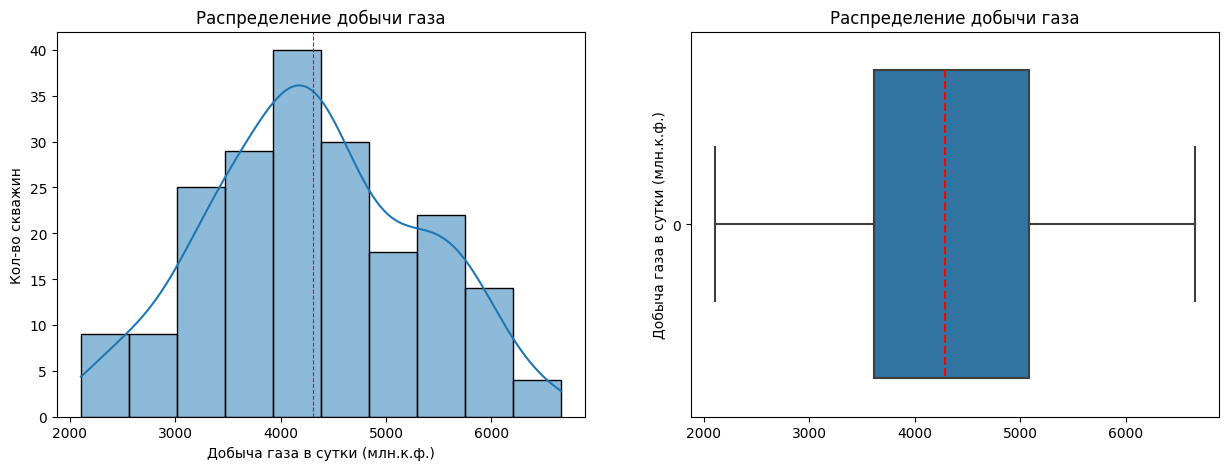

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['Prod'], kde=True, ax=axes[0])
axes[0].set(xlabel='Добыча газа в сутки (млн.к.ф.)', ylabel='Кол-во скважин')
axes[0].set_title('Распределение добычи газа')
axes[0].axvline(data['Prod'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['Prod'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Добыча газа в сутки (млн.к.ф.)')
axes[1].set_title('Распределение добычи газа')

plt.show()

Распределение добычи газа в сутки (млн. кубических футов) нормальное, выбросов в данных нет.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы:  0.00073


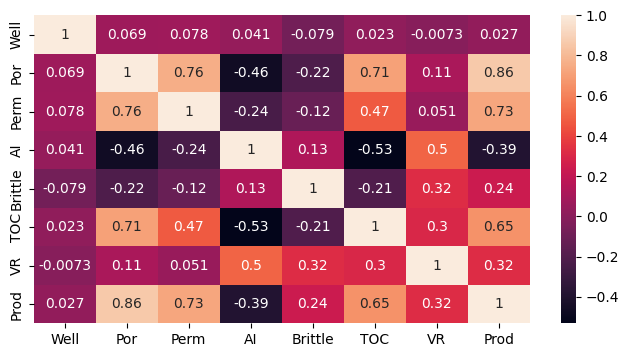

In [6]:
# Ваш код здесь

df_corr = data.corr()

# визуализирууем
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(df_corr, annot=True);

# вычисляем ранг и определитель
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(df_corr.values))
print('Определитель корреляционной матрицы: ', np.linalg.det(df_corr.values).round(5))

> *Ваши выводы здесь*  
Из строки Prod видно, что наиболее скоррелированными с целевым признаком факторами являются: Por(пористость скважины (%)), Perm(проницаемость скважины), TOC(общий органический углерод (%)).

Ответы на поставленные вопросы:
* Корреляционная матрица плохо обусловлена, определитель очень близок к нулю.
* Чистой коллинеарности нет, ранг корреляционной матрицы максимален. Однако определитель близок к нулю, а это указывает на наличие признаков имеющих сильную корреляцию между собой.
* Если матрица $A^T A$ вырождена или близка к вырожденной, то хорошего решения у классической модели не получится. Проверим это.

In [7]:
A = data.drop(columns='Prod').values
A = np.insert(A, 0 , np.ones(A.shape[0]), axis= 1 )
# вычисляем ранг и определитель
print('Ранг:', np.linalg.matrix_rank(A.T@A))
print('Определитель: ', np.linalg.det(A.T@A))


Ранг: 8
Определитель:  5.362148600218677e+21


Модель классической линейной регрессии по методу наименьших квадратов применима.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [8]:
# Ваш код здесь
# матрицу наблюдений мы считали выше.
X = A
# вектор правильных ответов
y = data[['Prod']]
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(w_hat.values.round(0))

[[-1232.]
 [    0.]
 [  230.]
 [  116.]
 [ -365.]
 [   25.]
 [  -78.]
 [  785.]]


> *Ваши выводы здесь*

Согласно модели, неинформативным можно назвать признак Well — идентификатор скважины. Т.к. коэффициент при этом признаке равен 0 и любое значение этого признака не оказывает влияния на целевой признак.

Для примера интерпретируем два следующих коэффициента:
- AI — акустический импеданс ($кг/м^2*10^6$), значение коэффициента -365;
- VR — коэффициент отражения витринита (%), значение коэффициента 785.

При увеличении AI на 1 пункт, значение целевой переменной Prod уменьшится на 365 млн. кубических футов. А при увеличении VR на 1 процентный пункт, значение целевой переменной Prod увеличится на 785 млн. кубических футов.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [9]:
# Ваш код здесь
well = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }

new = np.array([1] + list(well.values()))
prediction = (new@w_hat).values
print('prediction:', prediction)


prediction: [4723.06405371]


Расчитаем абсолютную ошибку: $e_{i} = \left | y_{i} - \hat{y_{i}} \right |$

In [10]:
true_value = 4748.315024
absolute_error = abs(true_value - float(prediction))
print('Абсолютная ошибка прогноза по указанной скважине:', absolute_error, 'млн. кубических футов')

Абсолютная ошибка прогноза по указанной скважине: 25.250970292820057 млн. кубических футов


In [11]:
# Построим прогноз выработки газа для всех скважин из обучающего набора данных

prediction_for_all_data = X@w_hat

Для оценки качества регрессионных моделей и сравнения их между собой возьмем метрику средняя абсолютная ошибка в процентах — MAPE (Mean Absolute Percent Error).

$MAPE = \sum_{i=1}^{n} \frac{\left | y_{i} - \hat{y_{i}} \right |}{\left | y_{i} \right |} \frac{100\%}{n}$

In [12]:
# расчитаем выбранную метрику
from sklearn import metrics

#Рассчитываем MAPE
print('MAPE score: {:.2f} %'.format(metrics.mean_absolute_percentage_error(y, prediction_for_all_data) * 100))


MAPE score: 3.63 %


> *Ваши выводы здесь*

Построенная модель в среднем ошибается на 3.63 %

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [13]:
# Ваш код здесь
def selection(value):
    if (value[0] >= 0 and value[1] >= 0) or (value[0] < 0 and value[1] < 0):
        return 'Совпадает'
    else:
        return 'Противоречит'

df = pd.DataFrame(df_corr['Prod'][:-1])
df['Coefficient'] = w_hat.values.round(0)[1:]
df['Difference'] = df[['Prod', 'Coefficient']].apply(selection, axis=1)
df

,Prod,Coefficient,Difference
Well,0.026817,0.0,Совпадает
Por,0.861910,230.0,Совпадает
Perm,0.727426,116.0,Совпадает
AI,-0.390835,-365.0,Совпадает
Brittle,0.237155,25.0,Совпадает
TOC,0.654445,-78.0,Противоречит
VR,0.323182,785.0,Совпадает


> *Ваши выводы здесь*

Фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции TOC.  
Полученное противоречие результатов возможно связано с наличием корреляции в признаках и соответственно нестабильной оценке коэффициентов.


### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

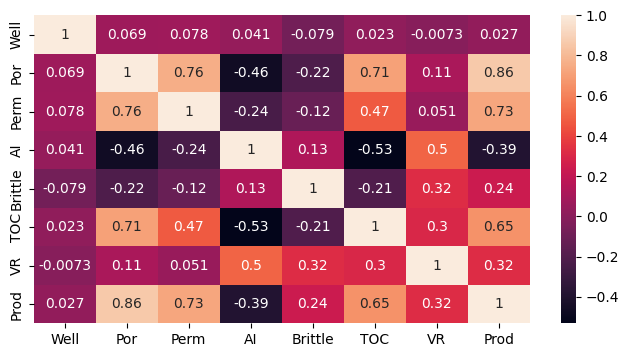

In [14]:
# Ваш код здесь

# посмотрим еще раз на матрицу корреляции
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(df_corr, annot=True);

In [15]:
# найдем признаки с коэффициентом корреляции больше 0.7
max_val = 0.7
n = 1
for i in df_corr.columns:
    ind = 0
    fl = 0
    for j in df_corr[i]:
        if i == df_corr.index[ind]:
            fl = 1
        elif fl == 1:
            if abs(j) > max_val:
                print(f'Пара {n}:')
                print(f'Признак 1: {i}')
                print(f'Признак 2: {df_corr.index[ind]}')
                print(f'Коэффициент корреляции: {round(j, 2)}')
                print('')
                n += 1
        ind += 1
if n == 1:
    print('Нет сильно коррелирующих признаков')


Пара 1:
Признак 1: Por
Признак 2: Perm
Коэффициент корреляции: 0.76

Пара 2:
Признак 1: Por
Признак 2: TOC
Коэффициент корреляции: 0.71

Пара 3:
Признак 1: Por
Признак 2: Prod
Коэффициент корреляции: 0.86

Пара 4:
Признак 1: Perm
Признак 2: Prod
Коэффициент корреляции: 0.73



Из сильно коррелированных между собой признаков удаляем Perm и TOC.  
И удаляем признак Well, т.к. корреляция с целевым признаком менее 0.05

In [16]:
#Удаляем признаки
data = data.drop(columns=['Perm', 'TOC', 'Well'])

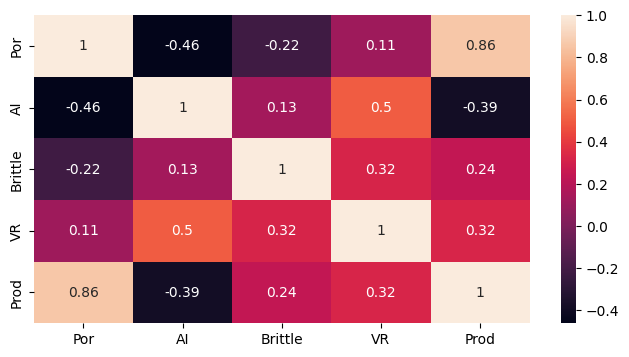

In [17]:
# посмотрим, что у нас получилось
df_corr = data.corr()
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(df_corr, annot=True);

In [18]:
# матрица наблюдений
X = data.drop(columns='Prod').values
X = np.insert(X, 0 , np.ones(X.shape[0]), axis= 1 )

# вектор правильных ответов
y = data[['Prod']]
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(w_hat.values.round(0))

[[-1835.]
 [  293.]
 [ -200.]
 [   28.]
 [  517.]]


In [19]:
# поищем противоречие коэффициентов линейной регрессии и коэффициентов корреляции
df = pd.DataFrame(df_corr['Prod'][:-1])
df['Coefficient'] = w_hat.values.round(0)[1:]
df['Difference'] = df[['Prod', 'Coefficient']].apply(selection, axis=1)
df

,Prod,Coefficient,Difference
Por,0.861910,293.0,Совпадает
AI,-0.390835,-200.0,Совпадает
Brittle,0.237155,28.0,Совпадает
VR,0.323182,517.0,Совпадает


In [20]:
# Построим прогноз выработки газа для всех скважин из обучающего набора данных
prediction_for_all_data = X@w_hat

#Рассчитываем MAPE
print('MAPE score: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y, prediction_for_all_data) * 100))

MAPE score: 4.04%


> *Ваши выводы здесь*

Для примера, интерпретируем те же коэффициенты, которые были использованы ранее:
- AI — акустический импеданс ($кг/м^2*10^6$), значение коэффициента -200;
- VR — коэффициент отражения витринита (%), значение коэффициента 517.

При увеличении AI на 1 пункт, значение целевой переменной Prod уменьшится на 200 млн. кубических футов. А при увеличении VR на 1 процентный пункт, значение целевой переменной Prod увеличится на 517 млн. кубических футов. По сравнению с предыдущими значениями, текущие значения коэффициентов снизились.

Значение используемой метрики MAPE, расчитанной по всему обучающему набору данных, увеличилось до 4.04 %. Теперь наша модель ошибается в средней на 4.04 %.  
В то же время нам удалось преодолеть противоречие коэффициентов линейной регрессии и коэффициентов корреляции, что должно сделать нашу модель более устойчивой.



### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [21]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

# создадим список для хранения результатов работы
ls_result = []

# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(X, y)
print('w_hat:',model.coef_.round(0))

prediction_for_all_data = model.predict(X)

#Рассчитываем MAPE
mape = round(metrics.mean_absolute_percentage_error(y, prediction_for_all_data) * 100, 2)
print('MAPE score: {:.2f}%'.format(mape))

ls_result.append(['LinearRegression', np.nan, 'Нет', mape, np.nan])

w_hat: [[-1835.   293.  -200.    28.   517.]]
MAPE score: 4.04%


> *Ваши выводы здесь*

Результаты библиотечной реализации, полностью совпали с результатами, которые мы получили ранее, расчитав показатели вручную.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [22]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [23]:
# Ваш код здесь

# матрица наблюдений
X = data.drop(columns='Prod')
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
print('Получилось факторов после генерации полиномиальных признаков:', X.shape[1])

Получилось факторов после генерации полиномиальных признаков: 34


In [24]:
# создаём модель линейной регрессии
lr = LinearRegression()
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

train_score = round(-cv_results['train_score'].mean() * 100, 2)
test_score = round(-cv_results['test_score'].mean() * 100, 2)

print('MAPE на тренировочных фолдах: {:.2f}%'.format(train_score))
print('MAPE на валидационных фолдах: {:.2f}%'.format(test_score))

ls_result.append(['LinearRegression', np.nan, 'Да', train_score, test_score])

MAPE на тренировочных фолдах: 1.77%
MAPE на валидационных фолдах: 2.68%


> *Ваши выводы здесь*

Нам удалось уменьшить ошибку (MAPE) на тренировочных фолдах до 1.77 % и на валидационных фолдах до 2.68 %.  
Наша модель стала лучше.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [25]:
# Ваш код здесь

param_grid = {'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2, 3, 4, 5, 6]}
grid_search = GridSearchCV(
    estimator=Lasso(max_iter=10000), 
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs = -1
)  
grid_search.fit(X, y)

param = grid_search.best_params_

print("Наилучшие значения гиперпараметров: {}".format(param))

Наилучшие значения гиперпараметров: {'alpha': 5}


In [26]:
# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=param['alpha'], max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

train_score = round(-cv_results['train_score'].mean() * 100, 2)
test_score = round(-cv_results['test_score'].mean() * 100, 2)

print('MAPE на тренировочных фолдах: {:.2f}%'.format(train_score))
print('MAPE на валидационных фолдах: {:.2f}%'.format(test_score))

ls_result.append(['Lasso', param, 'Да', train_score, test_score])

MAPE на тренировочных фолдах: 1.83%
MAPE на валидационных фолдах: 2.28%


> *Ваши выводы здесь*

Видим, что с помощью $L_1$-регуляризации удалось уменьшить ошибку модели (MAPE) на валидационных фолдах до 2.28% и сократить разницу в метриках на тренировочных и валидационных фолдах.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [27]:
# Ваш код здесь

param_grid = {'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2, 3, 4, 5, 6, 10, 20]}
grid_search = GridSearchCV(
    estimator=Ridge(max_iter=10000), 
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs = -1
)  
grid_search.fit(X, y)

param = grid_search.best_params_

print("Наилучшие значения гиперпараметров: {}".format(param))

Наилучшие значения гиперпараметров: {'alpha': 0.1}


In [28]:
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=param['alpha'], max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

train_score = round(-cv_results['train_score'].mean() * 100, 2)
test_score = round(-cv_results['test_score'].mean() * 100, 2)

print('MAPE на тренировочных фолдах: {:.2f}%'.format(train_score))
print('MAPE на валидационных фолдах: {:.2f}%'.format(test_score))

ls_result.append(['Ridge', param, 'Да', train_score, test_score])

MAPE на тренировочных фолдах: 1.77%
MAPE на валидационных фолдах: 2.67%


> *Ваши выводы здесь*

C помощью $L_2$-регуляризации уменьшить ошибку модели (MAPE) на валидационных фолдах, по сравнению с $L_1$-регуляризацией не удалось.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [29]:
# Ваш код здесь

param_grid = {'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2, 3, 4, 5, 6, 10, 20],
              'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
grid_search = GridSearchCV(
    estimator=ElasticNet(max_iter=10000), 
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs = -1
)  
grid_search.fit(X, y)

param = grid_search.best_params_

print("Наилучшие значения гиперпараметров: {}".format(param))

Наилучшие значения гиперпараметров: {'alpha': 0.1, 'l1_ratio': 0.9}


In [30]:
# создаём модель линейной регрессии c регуляризацией
en = ElasticNet(alpha=param['alpha'], l1_ratio=param['l1_ratio'], max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(en, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)

train_score = round(-cv_results['train_score'].mean() * 100, 2)
test_score = round(-cv_results['test_score'].mean() * 100, 2)

print('MAPE на тренировочных фолдах: {:.2f}%'.format(train_score))
print('MAPE на валидационных фолдах: {:.2f}%'.format(test_score))

ls_result.append(['ElasticNet', param, 'Да', train_score, test_score])

MAPE на тренировочных фолдах: 1.88%
MAPE на валидационных фолдах: 2.76%


> *Ваши выводы здесь*

C помощью комбинации $L_1$ и $L_2$-регуляризации уменьшить ошибку модели (MAPE) на валидационных фолдах, по сравнению с $L_1$-регуляризацией не удалось.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [31]:
# Ваш код здесь

df_rezult = pd.DataFrame(ls_result, 
                         columns=['Наименование модели', 'Гиперпараметры', 'Полиномиальные признаки', 'MAPE на тренировочных фолдах', 'MAPE на валидационных фолдах']
                         )
df_rezult

,Наименование модели,Гиперпараметры,Полиномиальные признаки,MAPE на тренировочных фолдах,MAPE на валидационных фолдах
0,LinearRegression,NaN,Нет,4.04,NaN
1,LinearRegression,NaN,Да,1.77,2.68
2,Lasso,{'alpha': 5},Да,1.83,2.28
3,Ridge,{'alpha': 0.1},Да,1.77,2.67
4,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",Да,1.88,2.76


> *Ваши выводы здесь*

Из таблицы видно, что наилучший результат с точки зрения качества на валидационных фолдах показала модель **Lasso**. Значение метрики MAPE равно 2.28%.  
Эта же модель показала лучший результат с точки зрения переобученности, т.к. у нее наименьшая разница между значением выбранной метрики расчитанной на тренировочных и валидационных фолдах.